Train Set Sample:


,Sr No.,Utterance,Speaker,Emotion,Sentiment,Dialogue_ID,Utterance_ID,Season,Episode,StartTime,EndTime
0,1,also I was the point person on my companys tr...,Chandler,neutral,neutral,0,0,8,21,"00:16:16,059","00:16:21,731"
1,2,You mustve had your hands full.,The Interviewer,neutral,neutral,0,1,8,21,"00:16:21,940","00:16:23,442"
2,3,That I did. That I did.,Chandler,neutral,neutral,0,2,8,21,"00:16:23,442","00:16:26,389"
3,4,So lets talk a little bit about your duties.,The Interviewer,neutral,neutral,0,3,8,21,"00:16:26,820","00:16:29,572"
4,5,My duties? All right.,Chandler,surprise,positive,0,4,8,21,"00:16:34,452","00:16:40,917"


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9989 entries, 0 to 9988
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sr No.        9989 non-null   int64 
 1   Utterance     9989 non-null   object
 2   Speaker       9989 non-null   object
 3   Emotion       9989 non-null   object
 4   Sentiment     9989 non-null   object
 5   Dialogue_ID   9989 non-null   int64 
 6   Utterance_ID  9989 non-null   int64 
 7   Season        9989 non-null   int64 
 8   Episode       9989 non-null   int64 
 9   StartTime     9989 non-null   object
 10  EndTime       9989 non-null   object
dtypes: int64(5), object(6)
memory usage: 858.6+ KB
None


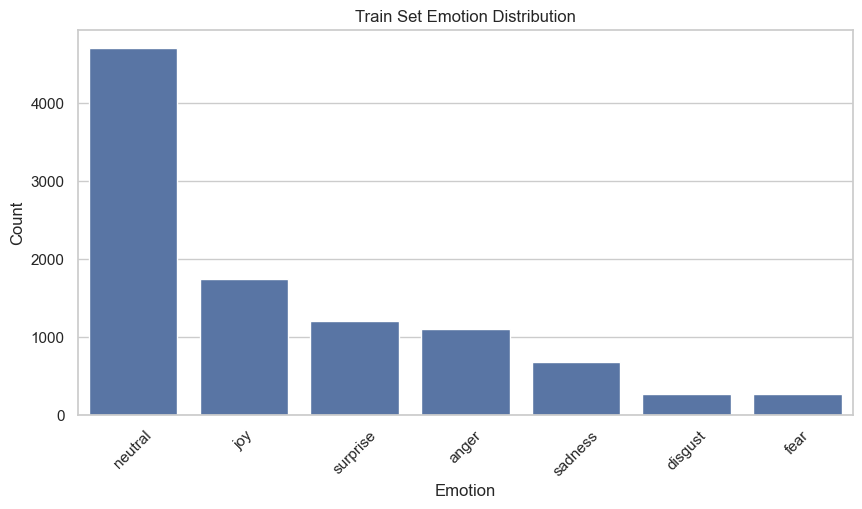

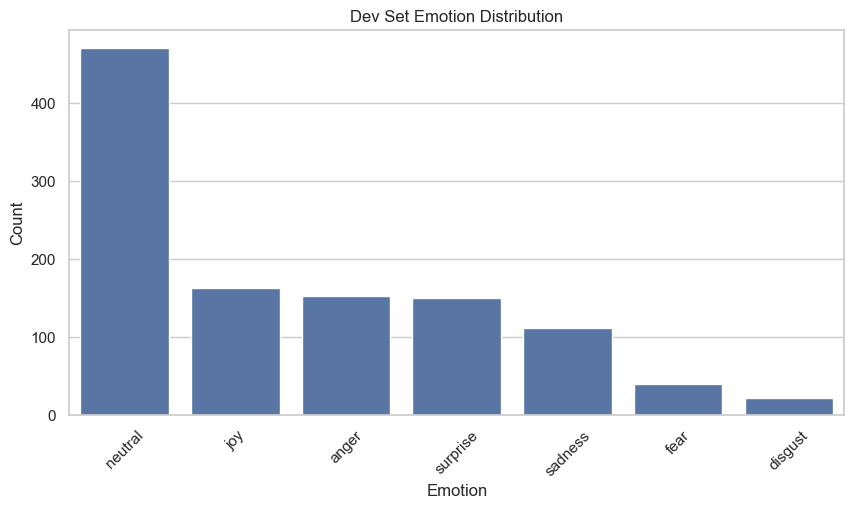

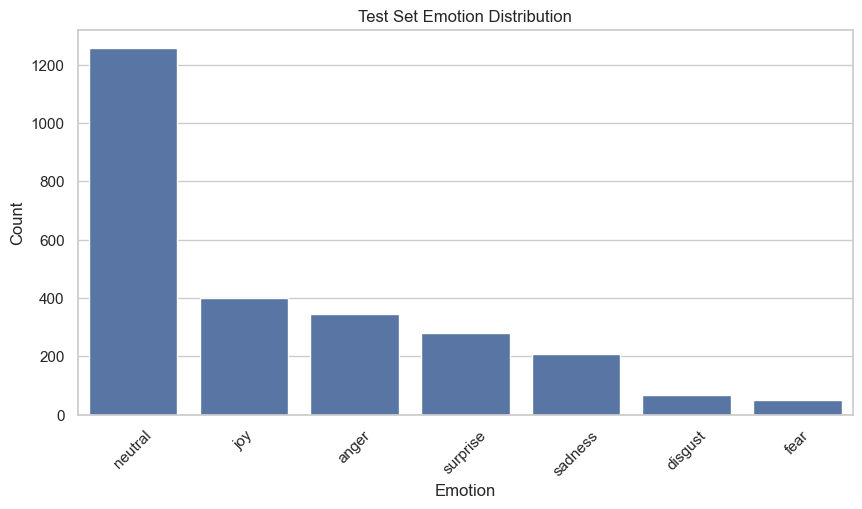

Null counts in train: 
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64
Null counts in dev: 
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64
Null counts in test: 
Sr No.          0
Utterance       0
Speaker         0
Emotion         0
Sentiment       0
Dialogue_ID     0
Utterance_ID    0
Season          0
Episode         0
StartTime       0
EndTime         0
dtype: int64
Average length: 7.96 words


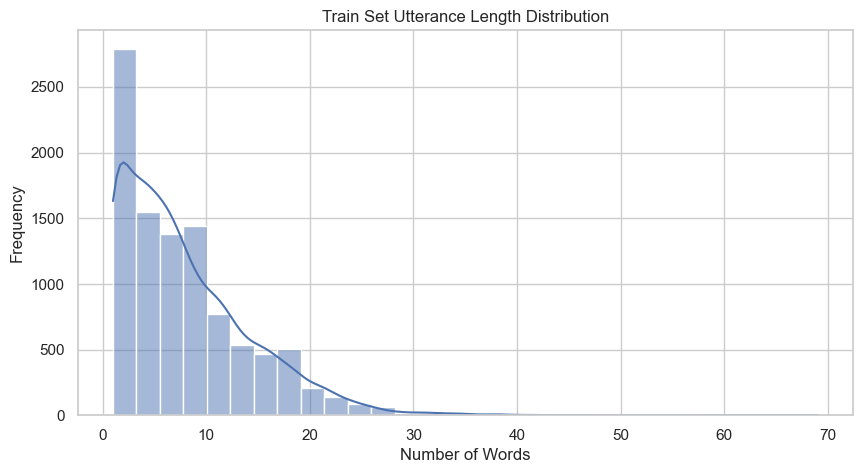

Average length: 7.92 words


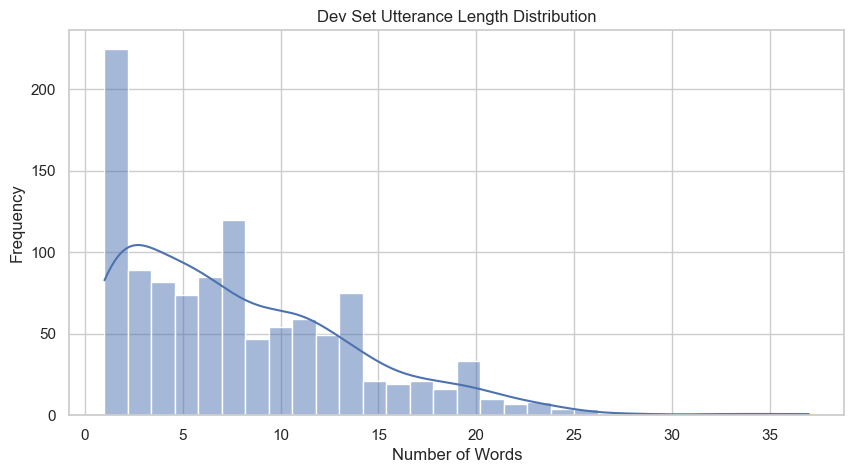

Average length: 8.22 words


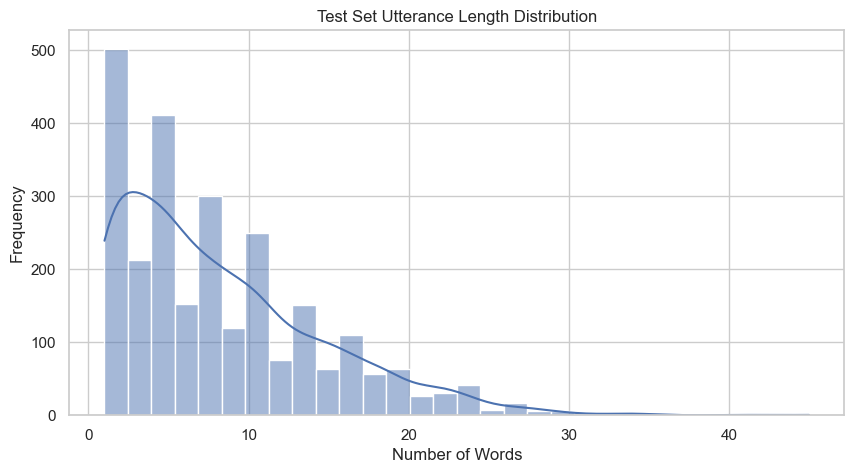

Most common words (overall) in train set:
[('you', 3067), ('i', 3020), ('the', 1854), ('to', 1627), ('a', 1557), ('and', 1192), ('it', 1063), ('oh', 1063), ('that', 1015), ('what', 821), ('im', 794), ('is', 760), ('me', 751), ('no', 741), ('this', 733)]

Most common words for emotion 'neutral':
[('you', 1373), ('i', 1320), ('the', 918), ('to', 783), ('a', 776), ('and', 540), ('that', 458), ('it', 449), ('okay', 425), ('yeah', 406), ('oh', 345), ('is', 340), ('im', 335), ('of', 333), ('in', 330)]

Most common words for emotion 'surprise':
[('you', 391), ('what', 255), ('oh', 241), ('i', 210), ('the', 150), ('my', 139), ('a', 124), ('that', 123), ('god', 114), ('are', 106), ('to', 105), ('is', 96), ('really', 92), ('this', 88), ('it', 80)]

Most common words for emotion 'fear':
[('i', 135), ('you', 82), ('to', 57), ('a', 45), ('no', 44), ('dont', 39), ('oh', 37), ('im', 37), ('and', 33), ('the', 33), ('it', 33), ('me', 31), ('just', 30), ('do', 30), ('not', 28)]

Most common words for em

In [3]:
# Exploratory Data Analysis (EDA) for MELD Dataset

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set plot styles
sns.set(style='whitegrid')

# Load the MELD dataset CSVs (adjust path as needed)
train_path = '../data/datasets/MELD/train_sent_emo.csv'
dev_path = '../data/datasets/MELD/dev_sent_emo.csv'
test_path = '../data/datasets/MELD/test_sent_emo.csv'

# Load data
train_df = pd.read_csv(train_path)
dev_df = pd.read_csv(dev_path)
test_df = pd.read_csv(test_path)

# Quick data overview
print("Train Set Sample:")
display(train_df.head())

print("Dataset Info:")
print(train_df.info())

# Emotion distribution in train/dev/test
def plot_emotion_distribution(df, title):
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.xlabel('Emotion')
    plt.ylabel('Count')
    plt.show()

plot_emotion_distribution(train_df, "Train Set Emotion Distribution")
plot_emotion_distribution(dev_df, "Dev Set Emotion Distribution")
plot_emotion_distribution(test_df, "Test Set Emotion Distribution")

# Check for missing/null values
print(f"Null counts in train: \n{train_df.isnull().sum()}")
print(f"Null counts in dev: \n{dev_df.isnull().sum()}")
print(f"Null counts in test: \n{test_df.isnull().sum()}")

# Utterance length analysis
def plot_utterance_length_distribution(df, title):
    lengths = df['Utterance'].apply(lambda x: len(str(x).split()))
    plt.figure(figsize=(10,5))
    sns.histplot(lengths, bins=30, kde=True)
    plt.title(title)
    plt.xlabel('Number of Words')
    plt.ylabel('Frequency')
    print(f"Average length: {np.mean(lengths):.2f} words")
    plt.show()

plot_utterance_length_distribution(train_df, "Train Set Utterance Length Distribution")
plot_utterance_length_distribution(dev_df, "Dev Set Utterance Length Distribution")
plot_utterance_length_distribution(test_df, "Test Set Utterance Length Distribution")

# Most common words overall and per emotion
from collections import Counter
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

def get_most_common_words(df, emotion=None, top_n=15):
    if emotion:
        texts = df[df['Emotion'] == emotion]['Utterance'].apply(clean_text)
    else:
        texts = df['Utterance'].apply(clean_text)
    words = ' '.join(texts).split()
    counter = Counter(words)
    return counter.most_common(top_n)

# Show overall most common words in train set
print("Most common words (overall) in train set:")
print(get_most_common_words(train_df))

# Show most common words per emotion
emotions = train_df['Emotion'].unique()
for emo in emotions:
    common_words = get_most_common_words(train_df, emotion=emo)
    print(f"\nMost common words for emotion '{emo}':")
    print(common_words)

